# Tutorial 7: beam cuts and more advanced options
In this tutorial, we will take a more in-depth look at how to obtain beam cuts.

In [1]:
#%matplotlib notebook # Uncomment for interactive plots when running the notebook!

import numpy as np

from PyPO.System import System
from PyPO.Enums import FieldComponents, Units

s = System()

2025-10-13 14:36:07 - WARNING - System override set to True. 


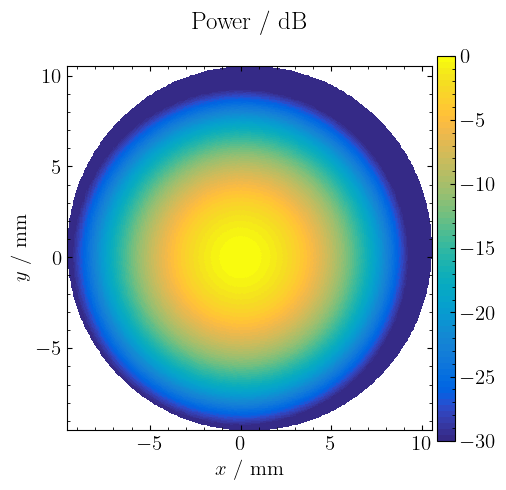

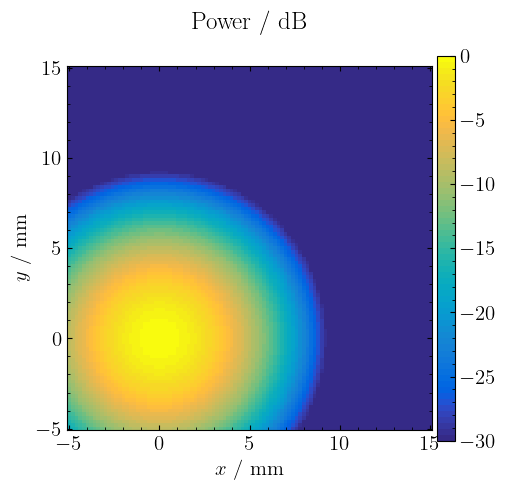

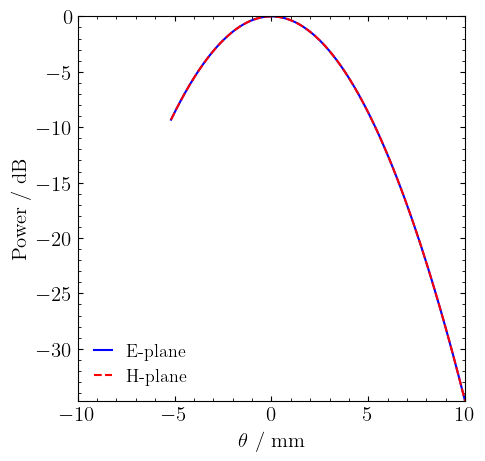

In [16]:
focus_uv = {
            "name"      : "focus_uv",
            "gmode"     : "uv",
            "lims_u"    : np.array([0, 10]),
            "lims_v"    : np.array([0, 360]),
            #"ecc_uv"    : 0.7,
            "gridsize"  : np.array([201, 360])
            }

focus_xy = {
            "name"      : "focus_xy",
            "gmode"     : "xy",
            "lims_x"    : np.array([-10, 10]),
            "lims_y"    : np.array([-10, 10]),
            "gridsize"  : np.array([101, 101])
            }

s.addPlane(focus_uv)
s.addPlane(focus_xy)

s.translateGrids("focus_uv", np.array([0.5,0.5,0]))
s.translateGrids("focus_xy", np.array([5,5,0]))

farfield = {
            "name"      : "farfield",
            "gmode"     : "AoE",
            "lims_Az"    : np.array([-20, 20]),
            "lims_El"    : np.array([-20, 20]),
            "gridsize"  : np.array([101, 101])
            }

s.addPlane(farfield)

GPODict_uv = {                                                                                                                                                                     
            "name"      : "source_uv",                                                                                                                                  
            "lam"       : 1,                                                                                                      
            "w0x"       : 5,                                                                                             
            "w0y"       : 5,                                                                                             
            "n"         : 1,                                                                                                                             
            "E0"        : 1,                                                                                                                                  
            "dxyz"      : 0,                                                                                                 
            "pol"       : np.array([1, 0, 0])                                                                                                          
}

GPODict_xy = {                                                                                                                                                                     
            "name"      : "source_xy",                                                                                                                                  
            "lam"       : 1,                                                                                                      
            "w0x"       : 5,                                                                                             
            "w0y"       : 5,                                                                                             
            "n"         : 1,                                                                                                                             
            "E0"        : 1,                                                                                                                                  
            "dxyz"      : 0,                                                                                                 
            "pol"       : np.array([1, 0, 0])                                                                                                          
}

s.createGaussian(GPODict_uv, "focus_uv")
s.createGaussian(GPODict_xy, "focus_xy")

s.plotBeam2D("source_uv", FieldComponents.Ex, vmin=-30, amp_only=True)
s.plotBeam2D("source_xy", FieldComponents.Ex, vmin=-30, amp_only=True)
#s.plotBeamCut("source_uv", FieldComponents.Ex)#, center=False, align=False)
s.plotBeamCut("source_xy", FieldComponents.Ex)

2025-10-13 14:36:11 - WORK - *** Starting PO propagation *** 
2025-10-13 14:36:11 - WORK - Propagating source_xy on focus_xy to farfield, propagation mode: FF. 
2025-10-13 14:36:11 - WORK - Hardware: running 256 CUDA threads per block. 
2025-10-13 14:36:11 - WORK - ... Calculating ... 
2025-10-13 14:36:12 - WORK - *** Finished: 0.208 seconds *** 
2025-10-13 14:36:12 - WORK - *** Starting PO propagation *** 
2025-10-13 14:36:12 - WORK - Propagating source_xy on focus_xy to farfield, propagation mode: FF. 
2025-10-13 14:36:12 - WORK - Hardware: running 256 CUDA threads per block. 
2025-10-13 14:36:12 - WORK - ... Calculating ... 
2025-10-13 14:36:12 - WORK - *** Finished: 0.124 seconds *** 
2025-10-13 14:36:12 - WORK - *** Starting PO propagation *** 
2025-10-13 14:36:12 - WORK - Propagating source_uv on focus_uv to farfield, propagation mode: FF. 
2025-10-13 14:36:12 - WORK - Hardware: running 256 CUDA threads per block. 
2025-10-13 14:36:12 - WORK - ... Calculating ... 
2025-10-13 14:3

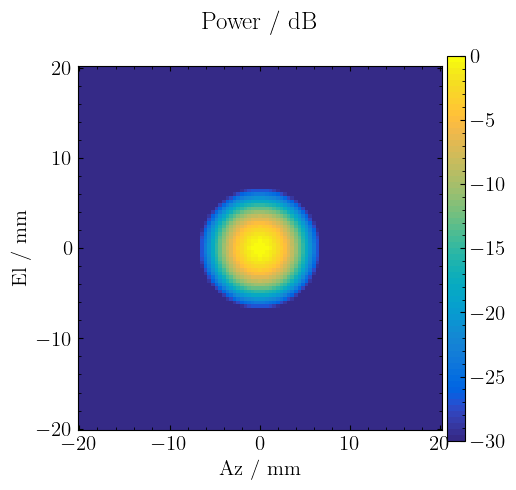

Units.MM
mm


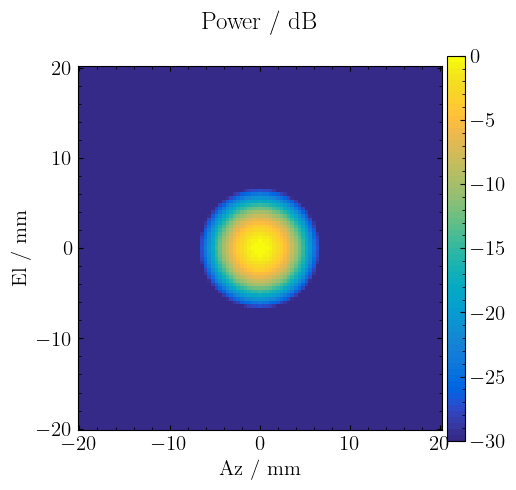

In [3]:
xy_to_ff = {
        "t_name"    : "farfield",
        "s_current" : "source_xy",
        "epsilon"   : 10,
        "mode"      : "FF",
        "name_EH"   : "EH_xy_ff",
        }

s.runPO(xy_to_ff)

uv_to_ff = {
        "t_name"    : "farfield",
        "s_current" : "source_uv",
        "epsilon"   : 10,
        "mode"      : "FF",
        "name_EH"   : "EH_uv_ff",
        }

s.runPO(xy_to_ff)
s.runPO(uv_to_ff)
s.plotBeam2D("EH_xy_ff", FieldComponents.Ex, vmin=-30, amp_only=True)
s.plotBeam2D("EH_uv_ff", FieldComponents.Ex, vmin=-30, amp_only=True)

Now we can simply plot the beamcuts

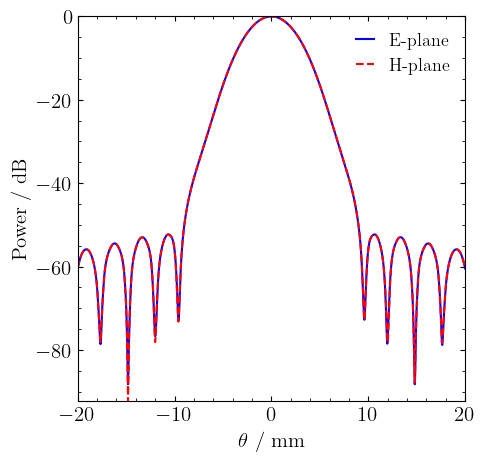

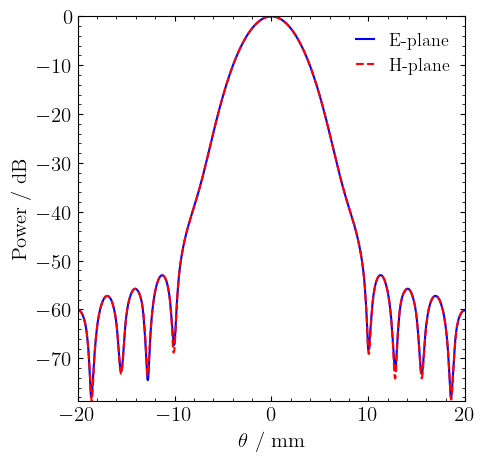

In [4]:
s.plotBeamCut("EH_xy_ff", FieldComponents.Ex)
s.plotBeamCut("EH_uv_ff", FieldComponents.Ex)